In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import env
import numpy as np
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

from wrangle_zillow import wrangle_zillow, scaled_zillow_columns
from explore import elbow_plot, run_kmeans, add_to_train

from sklearn.cluster import KMeans

In [4]:
train, validate, test = wrangle_zillow()



In [5]:
train.head()

,parcelid,bedroomcnt,calculatedfinishedsquarefeet,fireplacecnt,latitude,longitude,poolcnt,regionidcity,regionidzip,roomcnt,...,land_dollar_per_sqft,bed_bath_ratio,county,los_angeles,orange,ventura,central_heating,floor_wall_heating,no_heating,error
32407,12221537,3.0,1273.0,0.0,33945254.0,-118273655.0,0.0,12447.0,95984.0,0.0,...,27.301519,1.5,los_angeles,1,0,0,0,1,0,0.268492
32997,10767808,3.0,1380.0,0.0,34216726.0,-118580211.0,0.0,12447.0,96341.0,0.0,...,40.653641,1.5,los_angeles,1,0,0,1,0,0,-0.024149
32855,12029607,3.0,1703.0,0.0,34115303.0,-118326170.0,0.0,12447.0,96049.0,0.0,...,182.645955,1.5,los_angeles,1,0,0,1,0,0,0.003382
18482,14315204,2.0,2031.0,0.0,33581141.0,-117828130.0,1.0,40009.0,96978.0,6.0,...,159.613282,1.0,orange,0,1,0,0,0,1,0.041605
24544,12474338,3.0,1729.0,0.0,33850508.0,-118165817.0,0.0,12292.0,96212.0,0.0,...,59.574468,1.5,los_angeles,1,0,0,1,0,0,-0.001376


In [6]:
x = train[['error', 'calculatedfinishedsquarefeet']]
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)
train['cluster'] = kmeans.predict(x)
kmeans.predict(x)

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

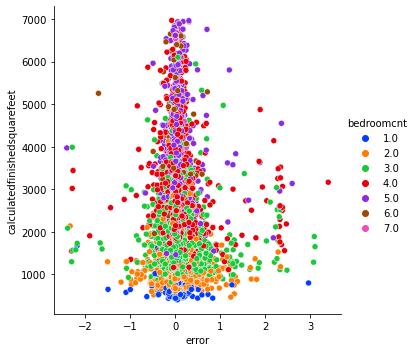

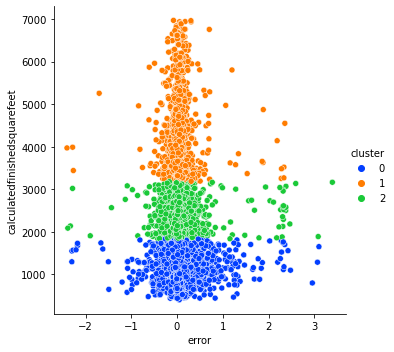

In [9]:
palette='bright'
sns.relplot(data=train, x='error', y='calculatedfinishedsquarefeet', hue='bedroomcnt', palette=palette)
plt.show()
sns.relplot(data=train, x='error', y='calculatedfinishedsquarefeet', hue='cluster', palette=palette)
plt.show()

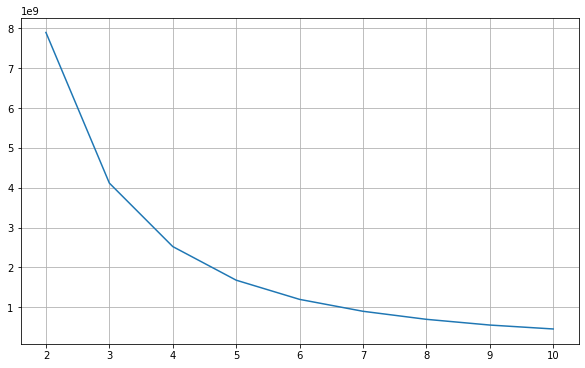

In [10]:
inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertias[k] = kmeans.inertia_
plt.figure(figsize=(10, 6))    
pd.Series(inertias).plot()
plt.grid()
plt.show()

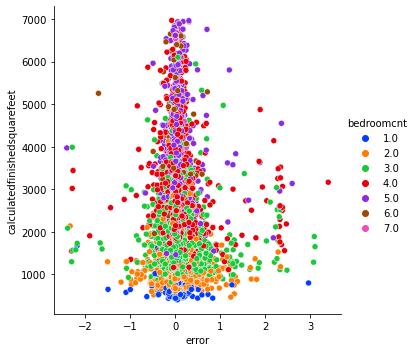

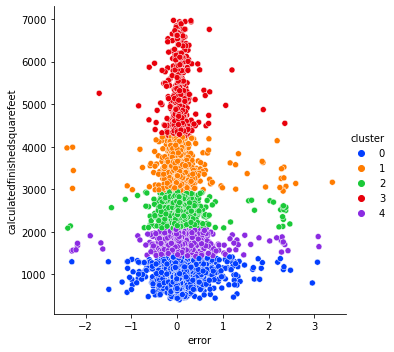

In [12]:
# selecting n_clusters=6 based on vizualization above
x = train[['error', 'calculatedfinishedsquarefeet']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
train['cluster'] = kmeans.predict(x)

palette='bright'

sns.relplot(data=train, x='error', y='calculatedfinishedsquarefeet', hue='bedroomcnt', palette=palette)
plt.show()
sns.relplot(data=train, x='error', y='calculatedfinishedsquarefeet', hue='cluster', palette=palette)
plt.show()